# A short analysis of Airbnb apartments in Munich, Germany
For most of the people who heard about Airbnb, it is interesting to enter this market and become competitive with others. One can start investigating the main parameters of an object and for which objects one may pay less or more. In this study, the Airbnb data of Munich city from kaggle.com was used. In this post, an investigation of some features of objects in Munich city, Germany was done.

### Section 1: Business Understanding
So let us take a look into the data and try to answer following questions:
1. How many objects are available in Munich and what is the price margin for an object in Munich city?
- For this question we need the columns of available and price in the calendar dataset. However, the data are not readable as float and boolean. So a preprocessing of data is needed.
2. What is number of beds, bedrooms for objects?
- In lisiting dataset the needed columns are available, by a histogram plot the results can help in understanding the solution.
3. How are the objects reviewed or rated?
- In lisiting dataset the needed columns are available, by a histogram plot the results can help in understanding the solution.
4. Is it possible to predict the price of an object based on number of beds, bedrooms, review score rating?
- A regressor can be made using scikitlearn and train a neural network model to predict the price of object based on some features.

### Loading specific modules/libraries for processing data
The data will be used for investigation objects situation in Munich City, Germany. Some libraries of python will be imported in order to process the data.

Section 1: Business Understanding
Section 2: Data Understanding
Section 3: Data Preparation
Section 4: Data Modeling (Optional)
Section 5: Evaluate the Results

In [1]:
# Importing Modules for data processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

### Section 2: Data Understanding
The csv data are read to different pandas dataframes to be used later.

In [2]:
# Set the path of dataframes
data_path = r'./Munich/' 

# loading the dataframes
calendar_df = pd.read_csv(data_path + 'calendar.csv')
listings_df = pd.read_csv(data_path + 'listings.csv')
reviews_df  = pd.read_csv(data_path + 'reviews.csv')

# size of dataframes
print("{:<20} {:>10} {:<5} {:>3} {:>5}".format('calendar_df has',"{:,.0f}".format(calendar_df.shape[0]),' rows and ',"{:,.0f}".format(calendar_df.shape[1]),' columns.'))
print("{:<20} {:>10} {:<5} {:>3} {:>5}".format('listings_df has',"{:,.0f}".format(listings_df.shape[0]),' rows and ',"{:,.0f}".format(listings_df.shape[1]),' columns.'))
print("{:<20} {:>10} {:<5} {:>3} {:>5}".format('reviews_df has',"{:,.0f}".format(reviews_df.shape[0]),' rows and ',"{:,.0f}".format(reviews_df.shape[1]),' columns.'))

calendar_df has       1,774,265  rows and    7  columns.
listings_df has           4,861  rows and   74  columns.
reviews_df has          119,722  rows and    6  columns.


### Section 3: Data Preparation
The data in calendar dataframe are not proper for direct usage so they are converted to desired float or boolean formats.

In [3]:
# Converting strings in the dataframe to floats and booleans
# converting the price in calendar dataframe to float numbers in the dataframe
calendar_df['price'] = calendar_df['price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# converting the string available to a boolean value in the dataframe
calendar_df['available'].replace('f', False, inplace=True)
calendar_df['available'].replace('t', True, inplace=True)

In [4]:
calendar_df.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,97945,2022-06-21,False,80.0,$80.00,2,90
1,97945,2022-06-22,False,80.0,$80.00,2,90
2,97945,2022-06-23,False,80.0,$80.00,2,90
3,97945,2022-06-24,False,80.0,$80.00,2,90
4,97945,2022-06-25,False,80.0,$80.00,2,90


In [5]:
# converting the price value in the listings dataframe to float number
listings_df['price'] = listings_df['price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))
listings_df['instant_bookable'].replace('t', True, inplace=True)
listings_df['instant_bookable'].replace('f', False, inplace=True)
listings_df['instant_bookable'].replace('t', True, inplace=True)

listings_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20220621060613,2022-06-21,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,...,4.93,4.78,4.73,NaN,False,2,2,0,0,0.99
1,114695,https://www.airbnb.com/rooms/114695,20220621060613,2022-06-21,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,https://www.airbnb.com/users/show/581737,...,5.00,4.56,4.59,NaN,False,2,2,0,0,0.40
2,127383,https://www.airbnb.com/rooms/127383,20220621060613,2022-06-21,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,https://www.airbnb.com/users/show/630556,...,4.96,4.91,4.81,NaN,False,1,1,0,0,0.79
3,159634,https://www.airbnb.com/rooms/159634,20220621060613,2022-06-21,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/4203267/08141...,765694,https://www.airbnb.com/users/show/765694,...,4.75,4.50,4.34,NaN,True,1,1,0,0,0.26
4,170154,https://www.airbnb.com/rooms/170154,20220621060613,2022-06-21,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,https://www.airbnb.com/users/show/108297,...,4.98,4.76,4.90,NaN,False,1,0,1,0,3.89


### Section 4: Evaluate the Results

#### Question 1: How many objects are available in Munich and what is the price margin for an object in Munich city?

From the calendar dataset, it can be obsereved how many objects are available. The unique number of objects in Munich in the dataset is 4861. The span of price in the dataset is from 0$ to 10800$. Most probably those objects with 0$ price should be investigated separately. The average price of the object is around 146$. Removing the outlier objects with prices over 400$ and cheaper than 10$ results in 4738 objects with average price of 108$ for in Munich. The distribution of object price without outlier object can be seen in following Figure 1.


In [6]:
# Calculating the unique number of objects in the calendar dataframe
print('The number of objects in calendar dataframe is',
      "{:,.0f}".format(calendar_df['listing_id'].nunique()))

The number of objects in calendar dataframe is 4,861


In [7]:
print('The maximum price of objects is',"{:,.2f}".format(calendar_df['price'].max()),'$')
print('The minimum price of objects is',"{:,.2f}".format(calendar_df['price'].min()),'$')
print('The average price of objects is',"{:,.2f}".format(calendar_df['price'].mean()),'$')
print('The maximum price of objects is',"{:,.2f}".format(calendar_df['price'][calendar_df['price'].between(10, 400)].mean()),'$')

The maximum price of objects is 10,800.00 $
The minimum price of objects is 0.00 $
The average price of objects is 146.39 $
The maximum price of objects is 108.84 $


In [8]:
print('The number of objects without ouliers in the calendar dataframe is',
      "{:,.0f}".format(calendar_df['listing_id'][calendar_df['price'].between(10, 400)].nunique()))

The number of objects without ouliers in the calendar dataframe is 4,738


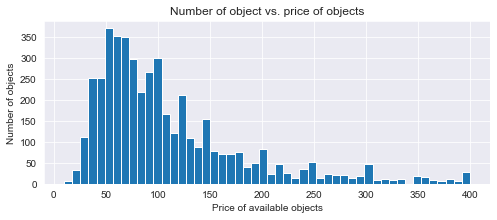

In [9]:
price = calendar_df.groupby('listing_id').mean()['price'].reset_index()

fig,ax = plt.subplots(nrows=1, sharex=True,figsize=(8, 3))
price['price'][price['price'].between(10, 400)].hist(bins=50)
plt.ylabel('Number of objects')
plt.xlabel('Price of available objects')
plt.title('Number of object vs. price of objects');

In [10]:
reviews_df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,97945,591337,2011-10-03,508190,Lauren,We very much enjoyed staying at Angelika's apa...
1,97945,796084,2011-12-20,341171,Marty & Evelyn,"Angelika was a very gracious host, and went ou..."
2,97945,964528,2012-03-02,1647967,Sue,The apartment was beautiful and Angelika provi...
3,97945,1353862,2012-05-26,2414638,Mel And George,We loved the warm welcome and was pleasantly s...
4,97945,1375610,2012-05-29,2323197,Anais,"Dès notre arrivée, notre hote nous a cordialem..."


The average number available objects 30.99 %


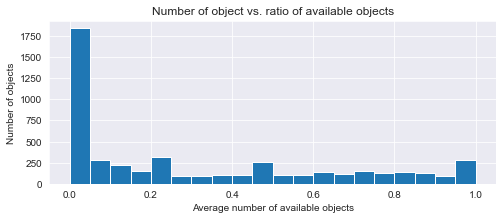

In [11]:
print('The average number available objects',"{:,.2f}".format(100*calendar_df['available'].mean()),'%')

fig,ax = plt.subplots(nrows=1, sharex=True,figsize=(8, 3))
calendar_df.groupby('listing_id').mean()['available'].hist(bins=20)
plt.ylabel('Number of objects')
plt.xlabel('Average number of available objects')
plt.title('Number of object vs. ratio of available objects');

#### Question 2: What is number of beds, bedrooms for objects?
By a short look at the data it can be seen that most of the objects only have just one bedroom. Approximately more than 80% of the objects only have just one room.


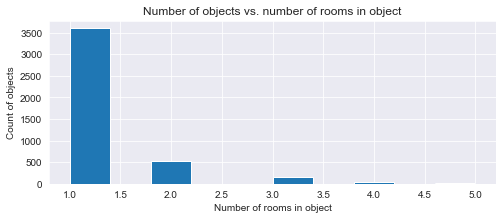

In [12]:
rooms_count = listings_df.groupby('id').mean()['bedrooms'].reset_index()

fig,ax = plt.subplots(nrows=1, sharex=True,figsize=(8, 3))
rooms_count['bedrooms'][rooms_count['bedrooms'].between(0,5)].hist(bins=10)
plt.ylabel('Count of objects')
plt.xlabel('Number of rooms in object')
plt.title('Number of objects vs. number of rooms in object');

This however does not mean that there is only one bed available in the object. Although most of the object again has just one bed but the portion of the object with more than one bed is considerable.

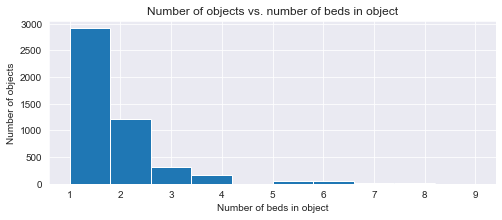

In [13]:
beds_count = listings_df.groupby('id').mean()['beds'].reset_index()

fig,ax = plt.subplots(nrows=1, sharex=True,figsize=(8, 3))
beds_count['beds'][beds_count['beds'] < 10].hist(bins=10)
plt.xlabel('Number of beds in object')
plt.ylabel('Number of objects')
plt.title('Number of objects vs. number of beds in object');

#### Question 3: How are the objects reviewed or rated?
For most of the objects in the dataset, there is no review available, see Figure below. This could make it very hard to use this feature for the quality/price analysis of these objects. 


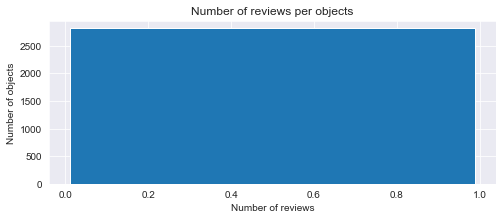

In [14]:
reviews_per_month = listings_df.groupby('id').mean()['reviews_per_month'].reset_index()
fig,ax = plt.subplots(nrows=1, sharex=True,figsize=(8, 3))
reviews_per_month['reviews_per_month'][reviews_per_month['reviews_per_month']<1].hist(bins=1)

plt.xlabel('Number of reviews')
plt.ylabel('Number of objects')
plt.title('Number of reviews per objects');

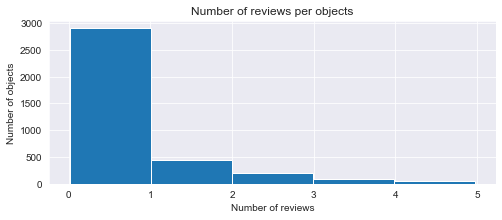

In [15]:
fig,ax = plt.subplots(nrows=1, sharex=True,figsize=(8, 3))
reviews_per_month['reviews_per_month'][reviews_per_month['reviews_per_month']<5].hist(bins=5)

plt.xlabel('Number of reviews')
plt.ylabel('Number of objects')
plt.title('Number of reviews per objects');

Removing again the outlier, the objects without any review, indicates that most of the remaining objects still only have or maybe 2 reviews, see Figure below.

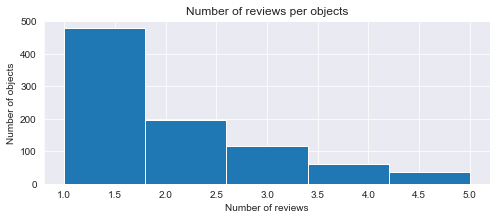

In [16]:
reviews_per_month = listings_df.groupby('id').mean()['reviews_per_month'].reset_index()
fig,ax = plt.subplots(nrows=1, sharex=True,figsize=(8, 3))
reviews_per_month['reviews_per_month'][reviews_per_month['reviews_per_month'].between(1,5)].hist(bins=5)

plt.xlabel('Number of reviews')
plt.ylabel('Number of objects')
plt.title('Number of reviews per objects');

In [17]:
reviews_per_month['id'].nunique()

4861

Now, taking a look to the score rating of objects show that the most of the rated objects have scores over 4.5. However, due to high number of objects without any review rating score, could also make it hard to use this feature for quality/price analysis of the object. The distribution of score rating is shown in Figure below. Honestly, it can be seen that those object whose customers were satisfied gave a review and score to the object.


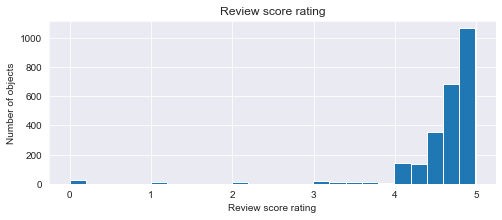

In [18]:
review_score_rating = listings_df.groupby('id').mean()['review_scores_rating'].reset_index()
fig,ax = plt.subplots(nrows=1, sharex=True,figsize=(8, 3))
review_score_rating['review_scores_rating'][review_score_rating['review_scores_rating'] < 5].hist(bins=25)
plt.xlabel('Review score rating')
plt.ylabel('Number of objects')
plt.title('Review score rating');

### Section 5: Data Modeling (Optional)

#### Question 4: Is it possible to predict the price of an object based on number of beds, bedrooms, review score rating?
Prediction of price is a very interesting topic for many data scientists. To do so, one can make a regressor by training a neural network and setting its inputs to number of beds, number of bedrooms and review score rating for an output defined as price of the object. This needs a very precise preprocessing of data as they could include nans which have to be omitted/corrected. And as seen above, the inputs with too many zeros could not be used for training a neural network without any effort.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor


Preprocessing the input and output data for modelling the price prediction based on selected features. Removing nans and values equal to zero.
1. Preparing the data as inputs and outputs of the model and split them as train and test dataset.
2. Making a neural network model for prediction of price.
3. Fitting the model to the training dataset and testing it against test dataset.

In [20]:
# dataframe with rows for nan are removed
listings_df = listings_df.dropna(subset=['bedrooms'], axis=0)[listings_df['bedrooms'] > 0]\
    [listings_df['beds'] > 0][listings_df['review_scores_rating'] > 0]
# preparing the data as inputs and outputs of the model
X = listings_df[['beds','bedrooms','review_scores_rating']]
Y = listings_df['price']

tic = time()

/var/folders/lq/fd263pl95vl70br52q7qp9xr0000gn/T/ipykernel_1163/304479728.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listings_df = listings_df.dropna(subset=['bedrooms'], axis=0)[listings_df['bedrooms'] > 0]\


In [21]:
# Split data into training and test data, and fit a linear model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=.10)
model = make_pipeline(QuantileTransformer(), MLPRegressor(hidden_layer_sizes=(100,100,100), 
                                                          learning_rate_init=0.01, 
                                                          early_stopping=True,
                                                          max_iter=100000,
                                                          tol=0.0001,
                                                          epsilon=1e-08),
)


# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
print("Training MLPRegressor...")
model.fit(X_train, Y_train)    
print(f"done in {time() - tic:.3f}s")
    
Y_test_preds = model.predict(X_test)  # Predictions here

# calculate rsquared and mse
rsquared_train = model.score(X_train, Y_train)
rsquared_test = model.score(X_test, Y_test)
# print(rsquared)
print('Test R2 score of training dataset',"{:,.2f}".format(100*rsquared_train),'%')
print('Test R2 score of testing dataset',"{:,.2f}".format(100*rsquared_test),'%')


Training MLPRegressor...
done in 2.231s
Test R2 score of training dataset 8.70 %
Test R2 score of testing dataset 15.76 %


### Summary:
Here we just take a short look at the Airbnb data of Munich City, Germany. One can rent an object with one bedroom including 1/2 beds for an average price of 100$. If renting an object which is rated, it is probably a good one. Predicting the price of objects based on some features would be possible but challenging.

Attention: The results here are just made as an exercise and should not be used as reference values.